In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.shape

(400, 5)

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
dataset.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

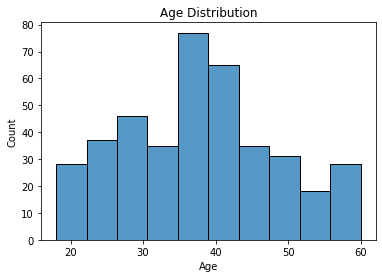

In [9]:
sns.histplot(dataset.Age)
plt.title('Age Distribution')
plt.show

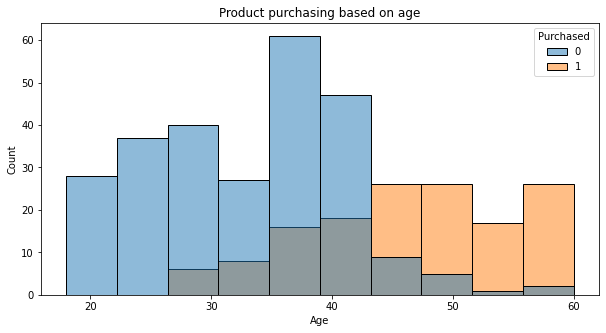

In [15]:
plt.figure(figsize=(10, 5))
plt.title("Product purchasing based on age")
sns.histplot(x='Age', hue="Purchased", data=dataset)
plt.show()

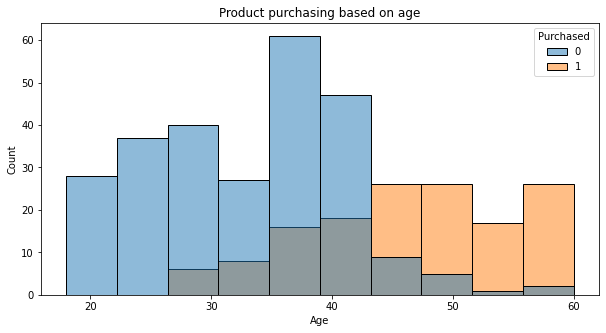

In [16]:
plt.figure(figsize=(10, 5))
plt.title("Product purchasing based on age")
sns.histplot(data=dataset, x='Age', hue="Purchased",)
plt.show()

In [17]:
# To convert gender(categorical value in our dataset to numerical(0,1) value which same as seen in the graph above)

dataset['Gender']=dataset['Gender'].replace(['Male', 'Female'],[0,1])

In [18]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [21]:
# Using KNN to determine if a target audience will purchase a product or not
#Execute the code to determine class feature and input feature

X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 4].values

In [23]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
# Scaling Features:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [25]:
# training the model:
# Fitting the K-NN to the training set
#N.B: p in the code below is the power parameter for the Minkowski metric. When p=2, this is equivalent to euclidean_distance

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [26]:
# Evaluating the model:
# Predicting the Test set results
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 0 1]


In [27]:
# Print the real values of the labels in the test dataset and compare with the predicted value

print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1]


In [28]:
# To evaluate the performance of the model, you can use thwe following code:

from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('------------------------------------------------------')
result=metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.92


Confusion Matrix:
[[73  6]
 [ 4 37]] 


------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



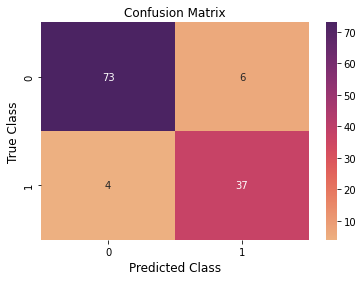

In [29]:
# Using seaborn heatmap to visualise the confusion matrix

ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize = 12)

plt.show()